# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fariq bin Sutikno
- **Email:** fariq.sutikno@gmail.com
- **ID Dicoding:** fariqsutikno

## Menentukan Pertanyaan Bisnis

- Apakah ada pola khusus dalam jumlah penyewaan? Jam berapa biasanya permintaan melonjak? 
- Apakah ada pola khusus dalam jumlah penyewaan? Apakah cuaca buruk juga mempengaruhi jumlah permintaan? Apakah hal itu berlaku juga saat hari libur?

## Import Semua Packages/Library yang Digunakan

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [36]:
hours_data = pd.read_csv("data/hour.csv")

In [37]:
hours_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [38]:
#Apa ada yang kosong?
hours_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [39]:
#Lihat tipe data? Apa ada yang duplikat?
hours_data.info()
print("Jumlah duplikat: ", hours_data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikat:  0


### Cleaning Data

In [40]:
# Berdasarkan hasil tersebut, kesimpulannya adalah:
# Kedua data tidak ada duplikat yang kosong
# Namun, permasalahannya adalah kolom "dteday" pada kedua data berupa object. Sedangkan yang diinginkan adalah datetime,
# Maka, kita mengubah kedua data tersebut menjadi datetime


hours_data.dteday = pd.to_datetime(hours_data.dteday)

In [41]:
hours_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [42]:
# Tahun -> Kategori Jam -> Rata-Rata (cnt)
hours_data.groupby(by=["hr"]).cnt.describe()

,count,mean,std,min,25%,50%,75%,max
hr,,,,,,,,
0,726.0,53.898072,42.307910,2.0,25.00,40.0,69.00,283.0
1,724.0,33.375691,33.538727,1.0,11.00,20.0,42.25,168.0
2,715.0,22.869930,26.578642,1.0,5.00,11.0,28.50,132.0
3,697.0,11.727403,13.239190,1.0,3.00,6.0,15.00,79.0
4,697.0,6.352941,4.143818,1.0,3.00,6.0,8.00,28.0
5,717.0,19.889819,13.200765,1.0,8.00,19.0,29.00,66.0
6,725.0,76.044138,55.084348,1.0,23.00,76.0,117.00,213.0
7,727.0,212.064649,161.441936,1.0,55.50,208.0,332.00,596.0
8,727.0,359.011004,235.189285,5.0,131.50,385.0,559.50,839.0


In [43]:
weather_map = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}

holiday_map = {
    0: "Hari Kerja",
    1: "Hari Libur"
}

hours_data['weathersit'] = hours_data['weathersit'].map(weather_map)
hours_data['holiday'] = hours_data['holiday'].map(holiday_map)

In [44]:
#Cuaca -> Holiday -> Rata-Rata
print(hours_data.groupby(["weathersit", "holiday"]).cnt.describe())

                           count        mean         std   min    25%    50%  \
weathersit   holiday                                                           
Berawan      Hari Kerja   4407.0  175.979124  165.584746   1.0  41.00  135.0   
             Hari Libur    137.0  148.992701  158.791970   1.0  28.00   80.0   
Cerah        Hari Kerja  11072.0  206.126084  190.246731   1.0  47.00  161.0   
             Hari Libur    341.0  164.061584  157.813942   1.0  32.00  114.0   
Hujan Lebat  Hari Kerja      3.0   74.333333   77.925178  23.0  29.50   36.0   
Hujan Ringan Hari Kerja   1397.0  111.848962  134.139738   1.0  21.00   64.0   
             Hari Libur     22.0   94.454545  109.768469   2.0  21.75   45.0   

                            75%    max  
weathersit   holiday                    
Berawan      Hari Kerja  257.00  957.0  
             Hari Libur  280.00  597.0  
Cerah        Hari Kerja  305.00  977.0  
             Hari Libur  258.00  712.0  
Hujan Lebat  Hari Kerja  100.00  

## Visualization & Explanatory Analysis

### Pertanyaan 1: Behaviour: Jam Berapa Biasanya Orang Menyewa Sepeda?

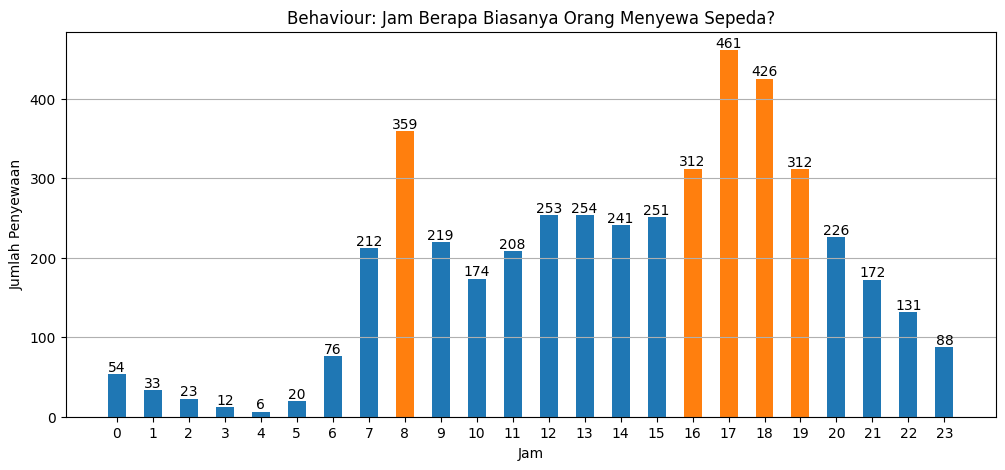

In [45]:
hours_mean = hours_data.groupby('hr')['cnt'].mean()
colors = ['tab:blue' if val <= 300 else 'tab:orange' for val in hours_mean.values]

plt.figure(figsize=(12, 5)) 
plt.bar(hours_mean.index, hours_mean.values, color=colors, width=0.5)
plt.title('Behaviour: Jam Berapa Biasanya Orang Menyewa Sepeda?')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(hours_mean.index)
plt.grid(axis='y', alpha=1)

# Menambahkan label di atas setiap batang
for i, v in enumerate(hours_mean):
    plt.text(i, v, f'{v:.0f}', ha='center', va='bottom')
plt.show()

### Pertanyaan 2:

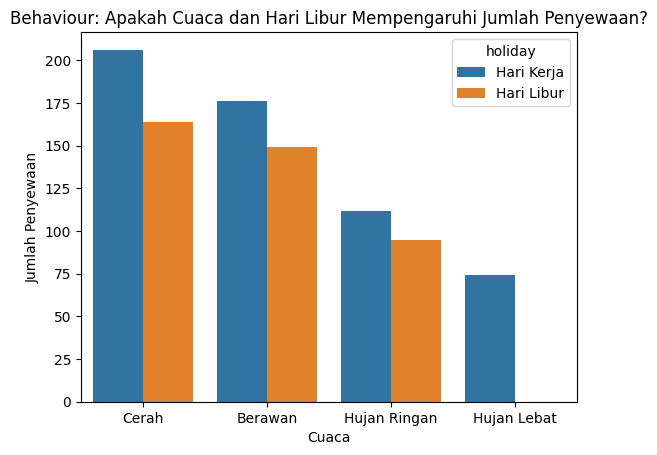

In [46]:

sns.barplot(data=hours_data, x="weathersit", y="cnt", hue="holiday", errorbar=None)
plt.title('Behaviour: Apakah Cuaca dan Hari Libur Mempengaruhi Jumlah Penyewaan?')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Penyewaan')

plt.show()

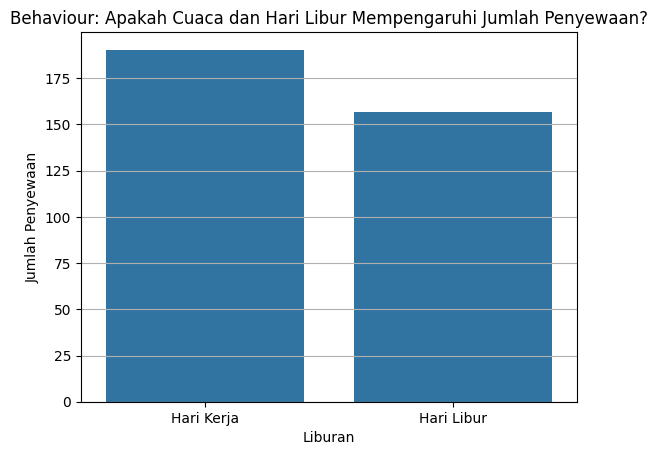

In [47]:
sns.barplot(data=hours_data, x="holiday", y="cnt", errorbar=None)
plt.title('Behaviour: Apakah Cuaca dan Hari Libur Mempengaruhi Jumlah Penyewaan?')
plt.xlabel('Liburan')
plt.ylabel('Jumlah Penyewaan')
plt.grid(axis='y', alpha=1)
plt.show()

## Kesimpulan

Berdasarkan data selama 2 tahun, pada 2011 - 2012, bisa kita tarik kesimpulan sebagai berikut: 

### Behaviour Penyewa: Angka Penyewaan Melonjak Saat Jam Sibuk
**Ini menjawab pertanyaan pertama, yaitu apakah ada pola khusus dalam jumlah penyewaan? Jam berapa biasanya permintaan melonjak?**
- Penyewaan sepeda mencapai puncaknya pada jam sibuk, terutama pukul 8 pagi dan antara pukul 4-7 malam. Dengan ini, menunjukkan banyaknya kebutuhan sepeda untuk transport ke tempat kerja.

- Permintaan terus meningkat hingga mencapai lebih dari 400 sepeda pada pukul 5-6 sore.

- Penurunan permintaan setelah pukul 8 pagi dan peningkatan bertahap mulai pukul 11 siang.

- Angka penyewaan pada tengah malam dan dini hari tetap ada. Menunjukkan penyewaan sepeda tetap diminati hingga malam hari. 

- Semakin malam semakin menurun angkanya, dan mulai naik perlahan pada jam 5 pagi.

### Behaviour Penyewa: Cuaca dan Hari Libur Memiliki Pengaruh dalam Jumlah Penyewaan
**Ini menjawab pertanyaan kedua, yaitu apakah ada pola khusus dalam jumlah penyewaan? Apakah cuaca buruk juga mempengaruhi jumlah permintaan? Apakah hal itu berlaku juga saat hari libur?**
- Permintaan pada hari kerja lebih tinggi daripada hari libur mencapai 20% pada cuaca terang. 

- Bahkan saat hujan deras, permintaan tetap ada pada hari kerja. Dengan ini, membuktikan bahwa penyewaan sepeda sangat dibutuhkan untuk mobilitas ke tempat kerja.
    
- Pada setiap perbedaan cuaca, ketika memburuk, akan terjadi penurunan angka permintaan juga. Sebaliknya jika membaik (cerah), maka permintaan akan meningkat juga. Ini menunjukkan bahwa cuaca adalah faktor yang mempengaruhi angka permintaan. Bahkan, di saat liburan dan hujan deras, hampir tidak ada angka permintaan.